In [230]:
import pandas as pd
import random
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# parametro = 0

## 1) Criando dados ficticios

In [231]:
# Generate random data
media_portugues = [random.uniform(5, 10) for _ in range(700)] + [random.uniform(8, 10) for _ in range(300)]
media_matematica = [random.uniform(5, 10) for _ in range(700)] + [random.uniform(8, 10) for _ in range(300)]

media_geral = [(media_p + media_m) / 2 for media_p, media_m in zip(media_portugues, media_matematica)]

data = {
    'Media_Portugues': media_portugues,
    'Media_Matematica': media_matematica,
    'Media_Geral': media_geral
}

sexos = ['Masculino', 'Feminino']
data['Sexo'] = [random.choice(sexos) for _ in range(1000)]

data['Idade'] = [random.randint(18, 30) for _ in range(700)] + [random.randint(25, 40) for _ in range(300)]

df = pd.DataFrame(data)

### 1.1) Normalizando e limpando dados

In [232]:
df = pd.DataFrame(data)

# Codificando o sexo usando one-hot encoding
df = pd.get_dummies(df, columns=['Sexo'], drop_first=True)

# Normalizando a idade 
scaler = MinMaxScaler()
df['Idade'] = scaler.fit_transform(df[['Idade']])

### 1.2) Criando uma coluna de destino (classificação de desempenho)

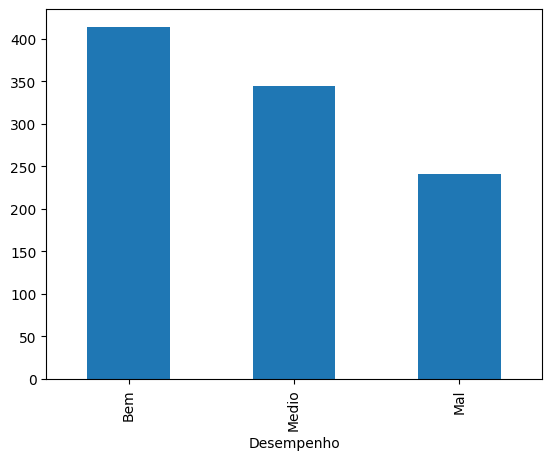

In [233]:
def classificar_desempenho(row):
    if row['Media_Geral'] >= 7.5 and row['Media_Matematica'] >= 8 and row['Media_Portugues'] >= 8:
        return 'Bem'
    elif row['Media_Geral'] >= 6 and row['Media_Matematica'] >= 6 and row['Media_Portugues'] >= 6:
        return 'Medio'
    else:
        return 'Mal'

df['Desempenho'] = df.apply(classificar_desempenho, axis=1)

# Visualize the distribution of 'Desempenho'
df['Desempenho'].value_counts().plot(kind='bar')
plt.show()

### 1.3) Dividir os dados em recursos (X) e rótulos (y)

In [234]:
X = df[['Media_Portugues', 'Media_Matematica', 'Media_Geral', 'Idade', 'Sexo_Masculino']]
y = df['Desempenho']

## 2) Dados de treinamento e teste

### 2.1) Modelos Simples

#### 2.1.1) Divisão dos dados

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2.1.2) Salvando dados

In [236]:
diretorioModeloSimples = f'./ModelosSimples/Conjunto_{parametro}'
if not os.path.exists(diretorioModeloSimples):
    os.makedirs(diretorioModeloSimples)

# Salvar os dados de treinamento
pd.DataFrame(X_train).to_csv(f'./ModelosSimples/Conjunto_{parametro}/X_train.csv', index=False)
pd.DataFrame(y_train).to_csv(f'./ModelosSimples/Conjunto_{parametro}/y_train.csv', index=False)

# Salvar os dados de teste
pd.DataFrame(X_test).to_csv(f'./ModelosSimples/Conjunto_{parametro}/X_test.csv', index=False)
pd.DataFrame(y_test).to_csv(f'./ModelosSimples/Conjunto_{parametro}/y_test.csv', index=False)

### 2.2) Redes Neurais

#### 2.2.1) Pré-processando dados

In [237]:
# Codificar as classes de desempenho em valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#### 2.2.2) Divisão dos dados

In [238]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2.2.3) Salvando dos dados

In [239]:
diretorioRedesNeurais = f'./RedesNeurais/Conjunto_{parametro}'
if not os.path.exists(diretorioRedesNeurais):
    os.makedirs(diretorioRedesNeurais)

# Salvar os dados de treinamento
pd.DataFrame(X_train).to_csv(f'./RedesNeurais/Conjunto_{parametro}/X_train.csv', index=False)
pd.DataFrame(y_train).to_csv(f'./RedesNeurais/Conjunto_{parametro}/y_train.csv', index=False)

# Salvar os dados de teste
pd.DataFrame(X_test).to_csv(f'./RedesNeurais/Conjunto_{parametro}/X_test.csv', index=False)
pd.DataFrame(y_test).to_csv(f'./RedesNeurais/Conjunto_{parametro}/y_test.csv', index=False)

print('Dados salvos com sucesso!')

Dados salvos com sucesso!
